In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py


In [2]:
col = ['area','rooms','price']
data = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/ex1data2.txt",names = col)

print(data)

    area  rooms   price
0   2104      3  399900
1   1600      3  329900
2   2400      3  369000
3   1416      2  232000
4   3000      4  539900
5   1985      4  299900
6   1534      3  314900
7   1427      3  198999
8   1380      3  212000
9   1494      3  242500
10  1940      4  239999
11  2000      3  347000
12  1890      3  329999
13  4478      5  699900
14  1268      3  259900
15  2300      4  449900
16  1320      2  299900
17  1236      3  199900
18  2609      4  499998
19  3031      4  599000
20  1767      3  252900
21  1888      2  255000
22  1604      3  242900
23  1962      4  259900
24  3890      3  573900
25  1100      3  249900
26  1458      3  464500
27  2526      3  469000
28  2200      3  475000
29  2637      3  299900
30  1839      2  349900
31  1000      1  169900
32  2040      4  314900
33  3137      3  579900
34  1811      4  285900
35  1437      3  249900
36  1239      3  229900
37  2132      4  345000
38  4215      4  549000
39  2162      4  287000
40  1664      2 

In [3]:
data.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [4]:
area = data['area']  #data.iloc[:0,1]
rooms = data['rooms']
price = data['price']

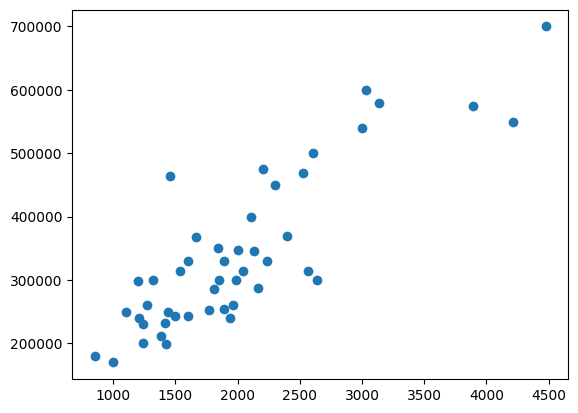

In [5]:
py.scatter(area,price)

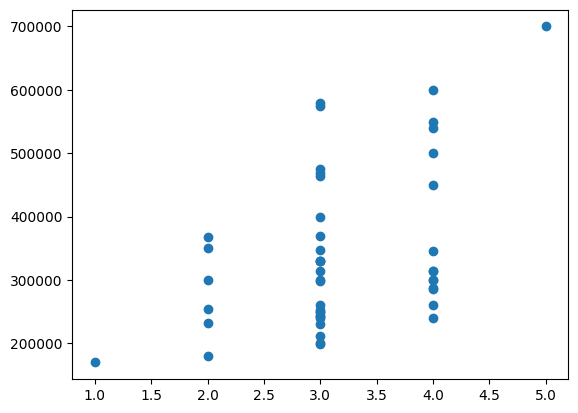

In [6]:
py.scatter(rooms,price)

In [7]:
def hypothesis(theta_arr , x1,x2):  # h0 = thita0 + thita1*x => y = mx+c
  return theta_arr[0] + theta_arr[1]*x1 + theta_arr[2]*x2

In [8]:
def feature_normalization(x):
  mean = np.mean(x,axis=0) # axis=0 => column wise mean
  std = np.std(x,axis=0)
  x_norm = (x-mean)/std
  return x_norm,mean,std

In [9]:
data_norm = data.values # convert frame to array
m = len(data_norm[:,0])
print(m)

47


In [10]:
x_in = data_norm[:,0:2].reshape(m,2)
x2,mean_x2,std_x2 = feature_normalization(x_in)


In [11]:
y2 = data_norm[:,-1].reshape(m,1)

In [16]:
theta_array = np.zeros((3,1))

In [17]:
def hypothesis(theta_arr , x1,x2):  # h0 = thita0 + thita1*x => y = mx+c
  # print(theta_arr)
  temp = theta_arr[0] + theta_arr[1]*x1 + theta_arr[2]*x2
  print(type(temp))
  return temp


In [18]:
def costfunction(theta_arr,x1,x2,y,m): #to find error in expected/predicted op and actual op
  total_cost = 0
  for i in range(m):
    total_cost +=((theta_arr[0]+theta_arr[1]*x1[i]+theta_arr[2]*x2[i])-y[i])**2

  return total_cost/(2*m)

In [19]:
def gradient_descent(theta_arr,x1,x2,y,m,alpha):
  summation_0 = 0;
  summation_1 = 0;
  summation_2 = 0;

  for i in range(m):
    summation_0+=((theta_arr[0]+theta_arr[1]*x1[i] + theta_array[2]*x2[i])-y[i])
    summation_1+=((theta_arr[0]+theta_arr[1]*x1[i] + theta_array[2]*x2[i])-y[i])*x1[i]
    summation_2+=((theta_arr[0]+theta_arr[1]*x1[i] + theta_array[2]*x2[i])-y[i])*x2[i]

  new_theta0 = theta_arr[0]-(summation_0*alpha/m)
  new_theta1 = theta_arr[1]-(summation_1*alpha/m)
  new_theta2 = theta_arr[2]-(summation_2*alpha/m)

  improvised_theta=[new_theta0,new_theta1,new_theta2]
  # print(improvised_theta)
  return improvised_theta


In [20]:
def training(x1,x2,y,alpha,epochs):
  theta_0 = 0
  theta_1 = 0
  theta_2 = 0

  m=x1.size
  cost_values=[]
  theta_array = [theta_0,theta_1,theta_2]
  for i in range(epochs):
    theta_array = gradient_descent(theta_array,x1,x2,y,m,alpha)
    loss=costfunction(theta_array,x1,x2,y,m)
    cost_values.append(loss)

  # print(theta_array)

  x=np.arange(0,epochs)
  py.plot(x,cost_values)

  py.show()
  return theta_array

In [21]:
alpha = 0.01
epochs = 1000

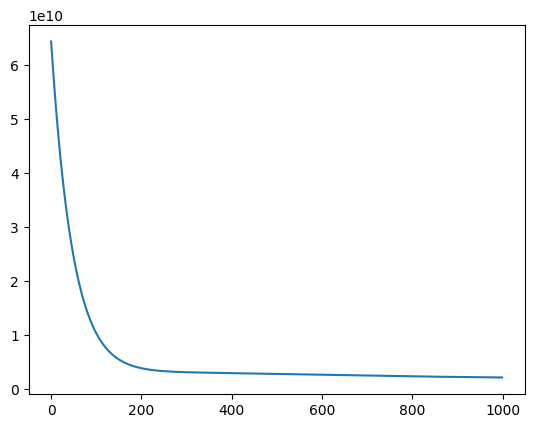

In [22]:
th=training(x2[:,0:1],x2[:,1:2],y2,alpha,epochs)

In [23]:
hypothesis(th, 3,2104)

<class 'numpy.ndarray'>


array([30251794.59802094])